In [1]:
# imports numpy, matplotlib
import numpy as np 
import matplotlib.pyplot as plt
import ThermalDiffusion as TS

In [2]:
# variable setup

# room temperature
T_air = 22.8 #dgree C

# duration of the graph staring at t0 = 0  to tf = t0 + dur
dur = 400# s


"""
Experiment Constants
"""

# heat input
Q = 0.5 #J

# thermal conductivity 
kappa = 4.01 # W cm^-1 K^-1
k_al = 2.37 # W cm^-1 K^-1
# volumetric heat capacity 
s =3.45 # J m^-2 K^-1
s_al = 2.422# J m^-2 K^-1
# delta x
dx = 0.1# cm
# delta t
dt = 0.001 # sec
# heater length
heaterLen = 1
# heat pulse duration
att = 0.5 #sec
# energy input set using raw data later
 # J

"""
ROD Conditions
"""
# length of rod
rodLen = 22 # cm
# radius of the cross section area
a =0.5*(1/8)*2.54  # cm
# cross section area
A = np.pi * a**2 # cm^2

# inital temperature of rod
ic =T_air

# boundary conditions
bcT = np.zeros((2,1))
bcS = np.zeros((2,1))

# Left end boundary conditions
# initial temperature 
bcT[0] = ic
# diffusion state
# 1) heat sunk
# 2) float
bcS[0] = 3

# Right end boundary conditions
# initial temperature 
bcT[1] = ic
# diffusion state
# 1) heat sunk
# 2) float
bcS[1] = 3

# heatloss 
heatlossBool = True

# position of heater
atX = rodLen/2


# time domain (for ploting and analytical method )
t = np.arange(0,dur,dt)


# convectiveHeatTransfer factor
h = 0.001175898656696838



In [3]:
y= TS.numMetVec(dur,rodLen,dt,dx,kappa,att,atX,heaterLen,bcT,ic,h,heatlossBool,Q,a,s,bcS) 

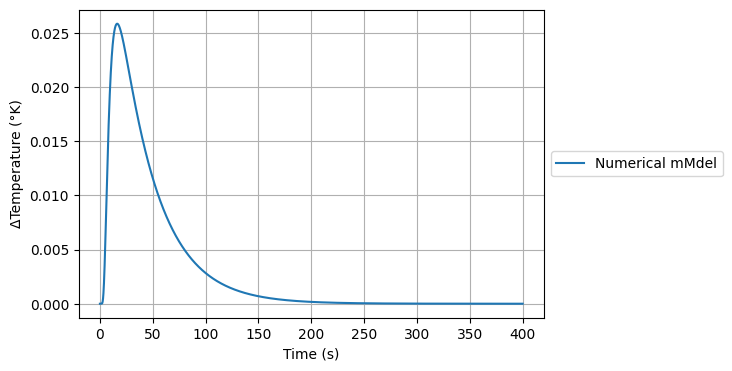

In [4]:
# position of the rod where you want to see the temp vs time graph
d = 2 # cm

plt.figure(figsize=(6, 4))
plt.plot(t,y[int(d/dx),:],label = 'Numerical mMdel')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Time (s)")
plt.ylabel("ΔTemperature (°K)")
plt.grid()